**`BANK MARKETING DATASET`**

**Dataset Information**

Data ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ("yes") atau tidak ("no") berlangganan. Ada empat dataset, diantaranya adalah:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

Dataset terkecil disediakan untuk menguji algoritma pembelajaran mesin yang lebih menuntut kompetensi (misalnya, SVM)

**Tujuan Klasifikasi**

Untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposit berjangka (variabel y)

# Import Library

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [43]:
df = pd.read_csv("dataset/bank-full.csv", sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Exploration

Melihat ringkasan pada data

In [44]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Berdasarkan keterangan diatas, menunjukkan bahwa pada data terdiri dari 2 tipe data yaitu kategori (object) dan numerik (int64). Serta memiliki 17 columns dan 45211 rows. 

Memeriksa dimensi pada data

In [45]:
# Dimension dataset
df.shape

(45211, 17)

Memeriksa apakah ada nilai yang hilang

In [46]:
# Check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Memeriksa duplikasi data

In [47]:
df.duplicated().sum()

0

Melihat distribusi dari variabel `y` (target)

In [48]:
tot_rows = len(df)
df.groupby("y").size()/tot_rows*100

y
no     88.30152
yes    11.69848
dtype: float64

Berdasarkan keterangan diatas, terlihat bahwa persentase terbanyak adalah `no` yaitu 88,30% dan untuk yes memiliki persentase 11.69%.

## Numerical Variable

In [49]:
# Specific data type (numerical)
num_var = df.select_dtypes(include=["int64"]).columns.values
print(num_var)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


Melihat korelasi antar variabel numerik.

In [50]:
# Find the correlation
corr = df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


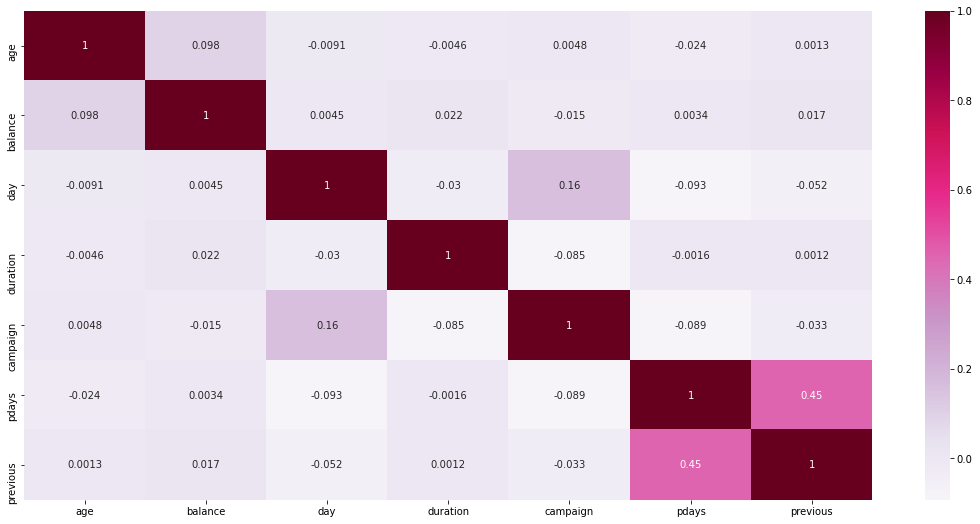

In [51]:
# Plotting the heatmaps
plt.subplots(figsize=(19, 9))
sns.heatmap(corr, cmap="PuRd", annot=True)
plt.show()

Melihat statistik variabel numerik pada data.

In [52]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Berdasarkan keterangan diatas, terlihat bahwa adanya beberapa variabel yang memiliki nilai outlier. Outlier dapat di cek menggunakan boxplot seperti dibawah ini.

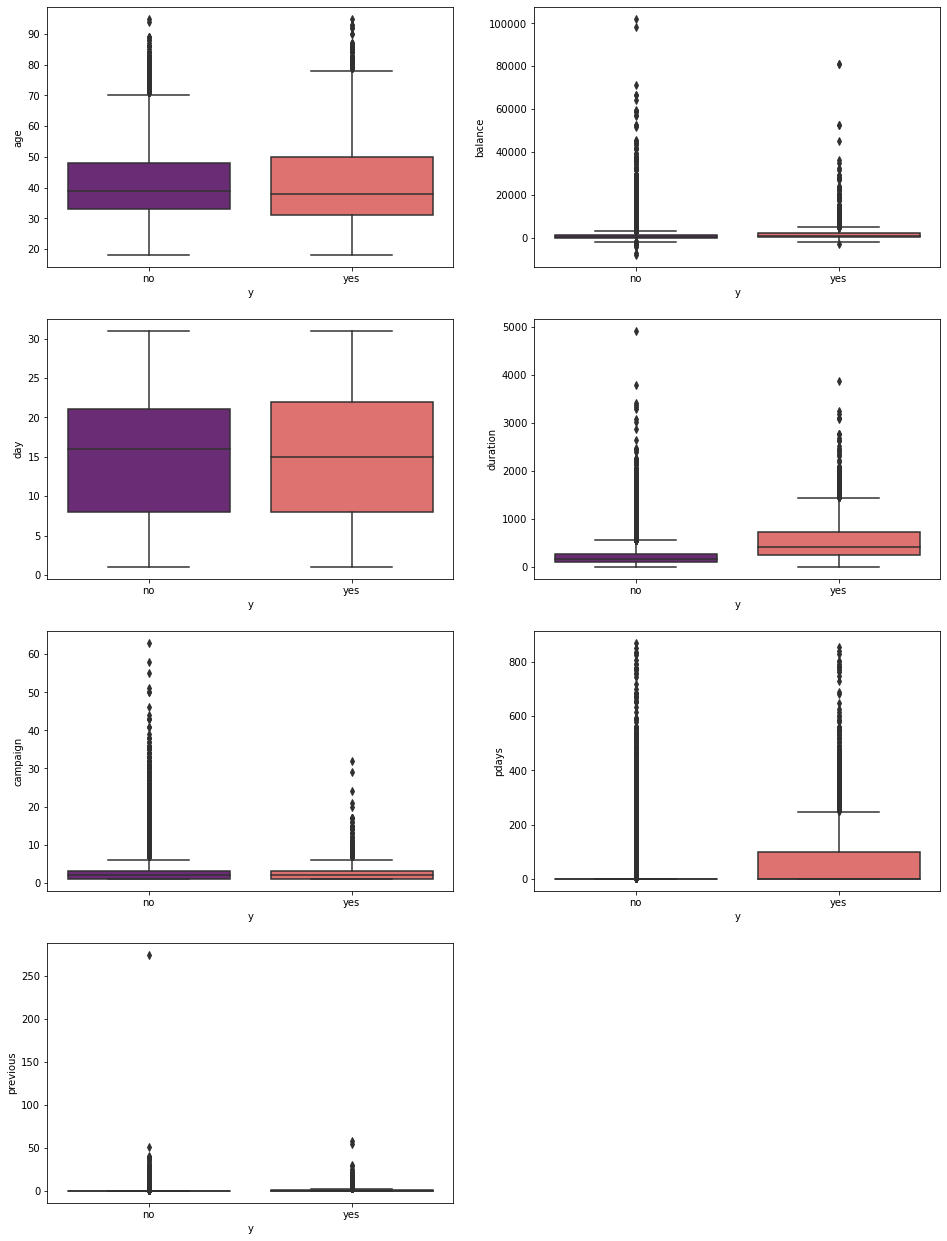

In [53]:
plt.figure(figsize=(16, 22))

# age
plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="magma")

# balance
plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="magma")

# day
plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="magma")

# duration
plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="magma")

# campaign
plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="magma")

# pdays
plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="magma")

# previous
plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="magma")

plt.show()

Berdasarkan hasil visualisasi boxplot diatas, variabel yang memiliki nilai outlier adalah variabel balance, duration, campaign, pdays, dan previous.

Hitung IQR

In [54]:
# First quartile (Q1)
Q1 = df.quantile(0.25)

# Third quartile (Q3)
Q3 = df.quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


Hasil diatas merupakan IQR untuk setiap variabel

Jika hasil print lower dan upper `False`, maka nilai sudah Valid, dan jika `True` maka menunjukkan adanya outlier

In [55]:
lower = df < (Q1 - 1.5 * IQR)
upper = df > (Q3 + 1.5 * IQR)
print("lower\n{}\n".format(lower.any()))
print("Upper\n{}\n".format(upper.any()))

lower
age          False
balance       True
campaign     False
contact      False
day          False
default      False
duration     False
education    False
housing      False
job          False
loan         False
marital      False
month        False
pdays        False
poutcome     False
previous     False
y            False
dtype: bool

Upper
age           True
balance       True
campaign      True
contact      False
day          False
default      False
duration      True
education    False
housing      False
job          False
loan         False
marital      False
month        False
pdays         True
poutcome     False
previous      True
y            False
dtype: bool



In [56]:
# remove outlier
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
df.shape

(28193, 17)

Cek kembali dengan visualisasi boxplot.

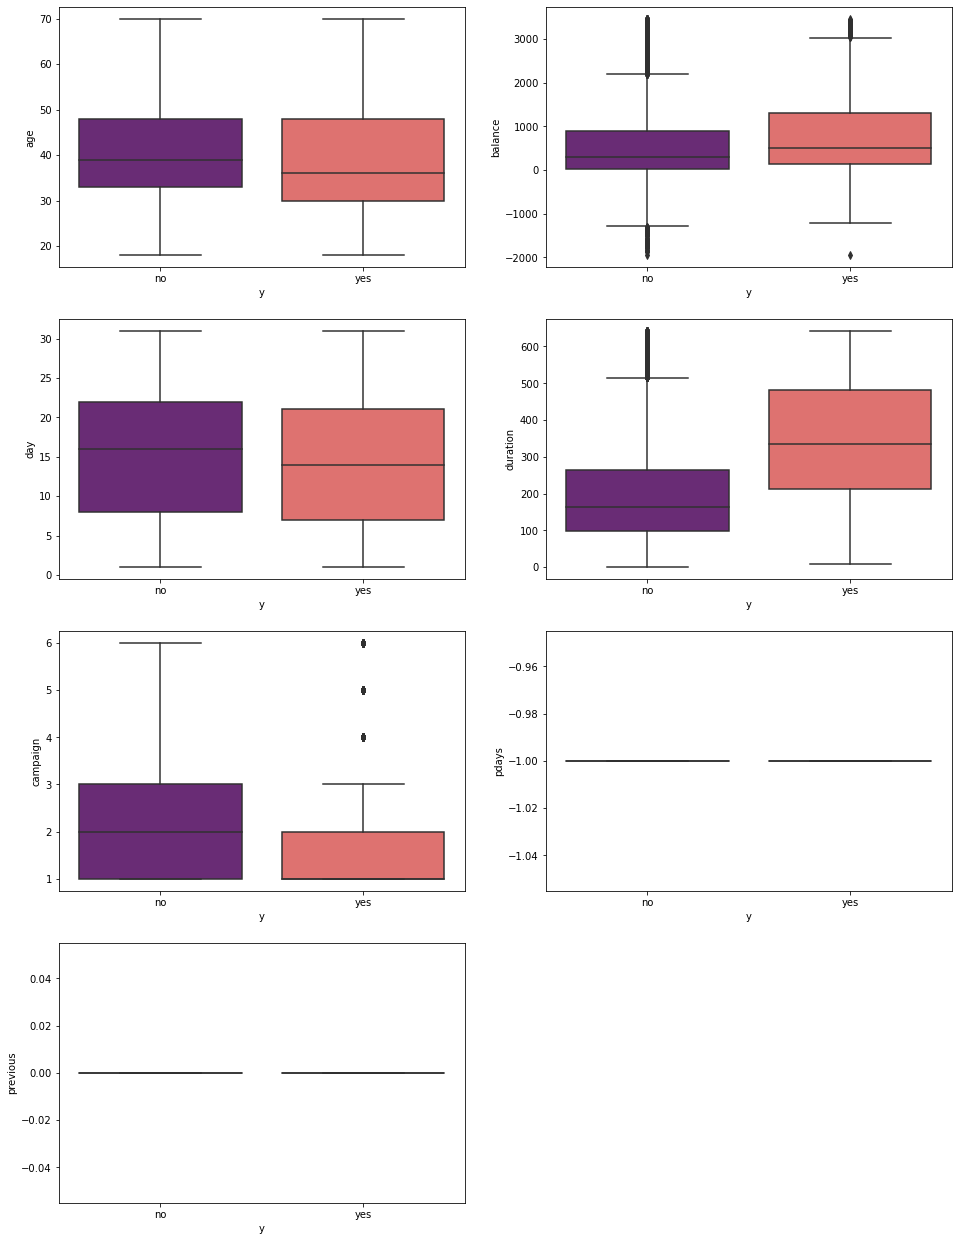

In [58]:
plt.figure(figsize=(16, 22))

# age
plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="magma")

# balance
plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="magma")

# day
plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="magma")

# duration
plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="magma")

# campaign
plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="magma")

# pdays
plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="magma")

# previous
plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="magma")

plt.show()

## Categorical variable

In [59]:
# Specific data type (categorical)
categ_var = df.select_dtypes(include=["object"]).columns.values
print(categ_var)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']


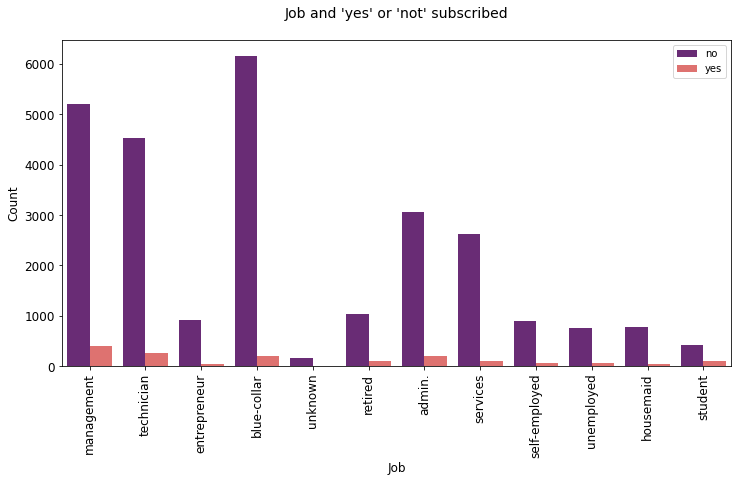

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="y", data=df, palette="magma")
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Job and 'yes' or 'not' subscribed\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, menunjukkan deposit berjangka berdasarkan `job`. Customer dengan job `blue-collar` cenderung tidak memiliki deposit berjangka dibandingkan dengan `job` lainnya.

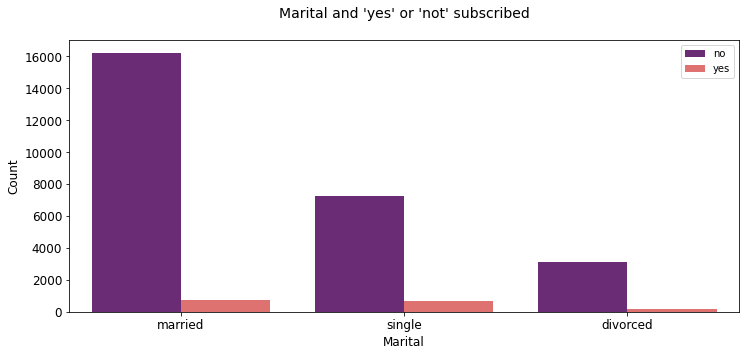

In [61]:
plt.figure(figsize=(12, 5))
sns.countplot(x="marital", hue="y", data=df, palette="magma")
plt.xlabel("Marital", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Marital and 'yes' or 'not' subscribed\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, menunjukkan deposit berjangka berdasarkan `marital` (status pernikahan). Customer berstatus `married` lebih tidak memiliki deposit berjangka dibandingkan dengan customer yang berstatus `single` dan `divorced`

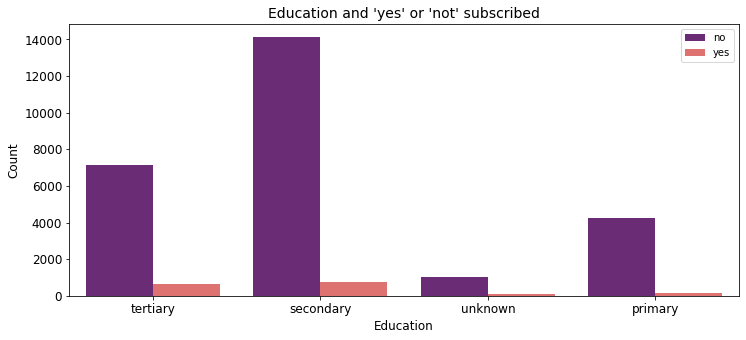

In [62]:
plt.figure(figsize=(12, 5))
sns.countplot(x="education", hue="y", data=df, palette="magma")
plt.xlabel("Education", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Education and 'yes' or 'not' subscribed", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, menunjukkan deposit berjangka berdasarkan `education`. Customer dengan pendidikan `secondary` lebih tidak memiliki deposit berjangka. 

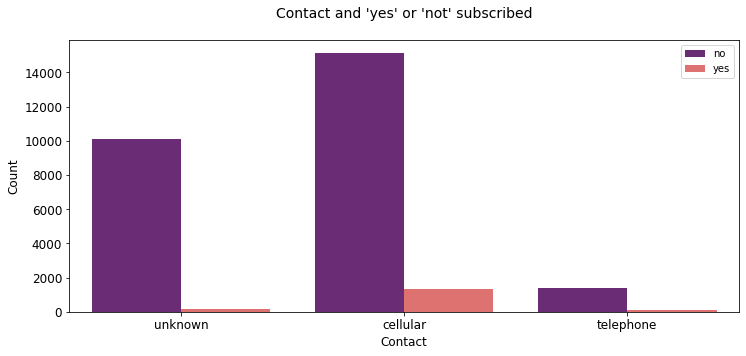

In [63]:
plt.figure(figsize=(12, 5))
sns.countplot(x="contact", hue="y", data=df, palette="magma")
plt.xlabel("Contact", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Contact and 'yes' or 'not' subscribed\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, menunjukkan deposit berjangka berdasarkan `contact`. Customer dengan jenis kontak `cellular` cenderung tidak berlangganan deposit berjangka.

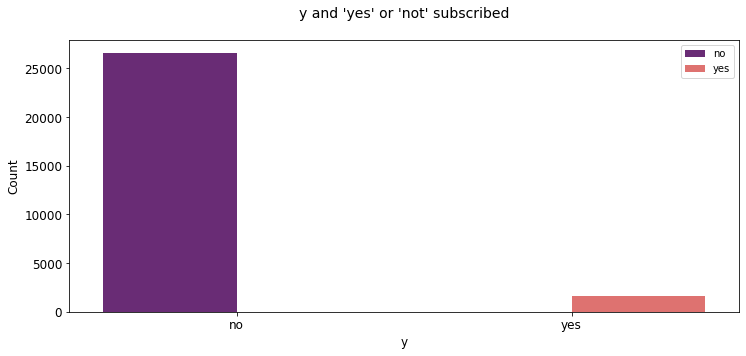

In [64]:
plt.figure(figsize=(12, 5))
sns.countplot(x="y", hue="y", data=df, palette="magma")
plt.xlabel("y", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("y and 'yes' or 'not' subscribed\n", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Berdasarkan visualisasi diatas, menunjukkan bahwa customer cenderung lebih tidak berlangganan deposit berjangka.

# Building Model

Memisahkan dataset menjadi `data` dan `target`

In [65]:
# data
X = df.drop("y", axis=1)

# target
y = df["y"]

In [66]:
X = pd.get_dummies(X)

In [67]:
# data
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,1428,16,333,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45202,34,557,17,224,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
45203,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [68]:
# target
y

0         no
1         no
2         no
3         no
4         no
        ... 
45198     no
45202    yes
45203    yes
45205    yes
45209     no
Name: y, Length: 28193, dtype: object

In [69]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Shapes (X)
print(X_train.shape)
print(X_test.shape)

# Shapes (y)
print(y_train.shape)
print(y_test.shape)

(19735, 48)
(8458, 48)
(19735,)
(8458,)


In [70]:
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

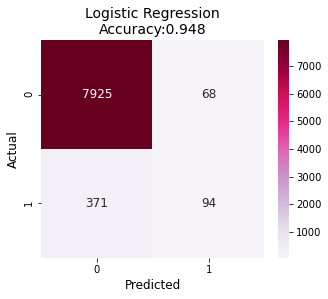

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.99      0.97      7993
         yes       0.58      0.20      0.30       465

    accuracy                           0.95      8458
   macro avg       0.77      0.60      0.64      8458
weighted avg       0.93      0.95      0.94      8458



In [71]:
# Training the model on training set
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_lr.predict(X_test)

# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report\n", classification_report(y_test, y_pred))


## K-Nearest Neighbors

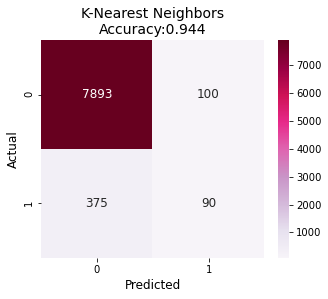

Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.99      0.97      7993
         yes       0.47      0.19      0.27       465

    accuracy                           0.94      8458
   macro avg       0.71      0.59      0.62      8458
weighted avg       0.93      0.94      0.93      8458



In [72]:
# Training the model on training set
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_knn.predict(X_test)

# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

## Support Vector Machine

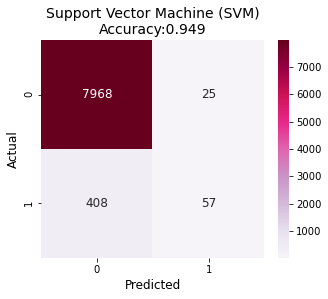

Classification Report:
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      7993
         yes       0.70      0.12      0.21       465

    accuracy                           0.95      8458
   macro avg       0.82      0.56      0.59      8458
weighted avg       0.94      0.95      0.93      8458



In [73]:
# Training the model on training set
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_svm.predict(X_test)

# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine (SVM)\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

## Decision Tree

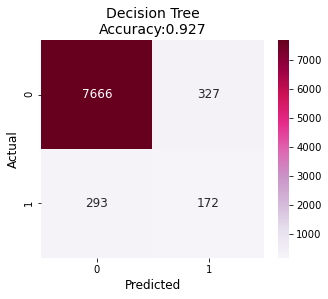

Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.96      0.96      7993
         yes       0.34      0.37      0.36       465

    accuracy                           0.93      8458
   macro avg       0.65      0.66      0.66      8458
weighted avg       0.93      0.93      0.93      8458



In [74]:
# Training the model on training set
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_tree.predict(X_test)
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

## Random Forest

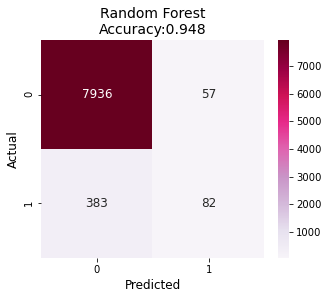

Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.99      0.97      7993
         yes       0.59      0.18      0.27       465

    accuracy                           0.95      8458
   macro avg       0.77      0.58      0.62      8458
weighted avg       0.93      0.95      0.93      8458



In [75]:
# Training the model on training set
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_rf.predict(X_test)

# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

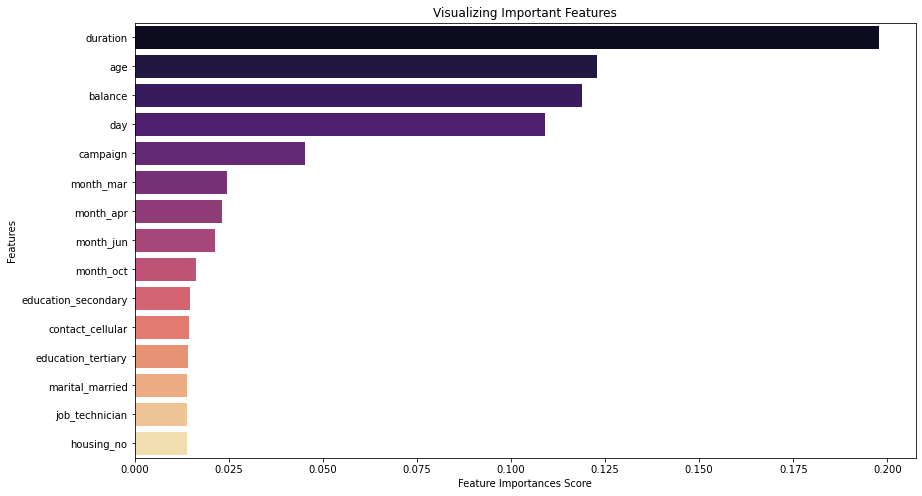

In [76]:
feature_imp = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="magma")
plt.xlabel("Feature Importances Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

Berdasarkan visualisasi diatas, menunjukkan fitur-fitur terpenting. 5 fitur tersebut diantaranya adalah `duration`, `balance`, `age`, `day`, dan `campaign`.

## Naive Bayes


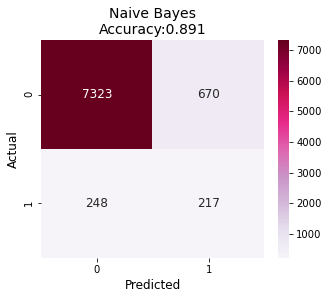

Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.92      0.94      7993
         yes       0.24      0.47      0.32       465

    accuracy                           0.89      8458
   macro avg       0.61      0.69      0.63      8458
weighted avg       0.93      0.89      0.91      8458



In [77]:
# Training the model on training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_nb.predict(X_test)

# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)
 
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analysis

- Customer dengan pekerjaan "blue-collar", cenderung tidak berlangganan deposit berjangka dibandingkan Customer dengan pekerjaan "management" yang cenderung lebih berlangganan deposit berjangka.
- Customer dengan status pernikahan "married" cenderung tidak berlangganan deposit berjangka dibandingkan Customer yang berstatus "single" dan "divorced".
- Customer dengan jenis kontak "cellular" cenderung tidak berlangganan deposit berjangka.
- Customer dengan usia yang tua dan memiliki saldo yang tinggi, cenderung berlangganan deposit berjangka.
- Dari model yang telah dibuat berdasarkan macam-macam metode klasifikasi, bahwa metode klasifikasi SVM (Support Vector Machine) memiliki akurasi yang lebih tinggi yaitu 94,8%.